# Boundary value problem

### In general case:

$L[y]=y''+p(x)y+q(x)y=f(x)$

$l_a[y]=\alpha_0y(a)+\alpha_1y'(a)=A$

$l_b[y]=\beta_0y(b)+\beta_1y'(b)=B$

for $x\in[a,b]$

## 1. Consider the following boundary value problem:

$\frac{d^2y}{dx^2}-\frac{dy}{dx}\ln(x)-2y=1$ for $x \in [0.5,1.5]$

### with the boundary conditions:

$y(0.5)+y'(0.5)=1$, $y(1.5)-y'(1.5)=0$

1.1. Solve this problem using finite difference method of the second order. Use the uniform grid. Is this method stable for step size $h=0.125$? Find number of grid points required to achieve accuracy of the order of 1e-6.

### *Don't forget to include the boundary conditions!*

1.2. Use the first order one-sided numerical approximation for the first derivative and write a new scheme. Find number of grid points required to achieve accuracy of the order of 1e-6.

1.3. Plot the solutions of both methods on the same figure. Compare results and discuss differences (if occurs).

0.043409633321472185
0.028670325409335007
0.016085512420906056
0.008480996214439429
0.004350107249614155
0.0022024613199960186
0.001108085692113292
0.0005557699775486924
25600
1.0174867761988047
0.5743030984185769
0.30606871384265766
0.15813230624296715
0.08039062748839321
3200


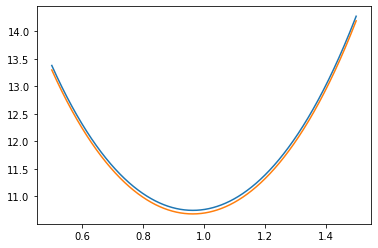

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

#1.1.
def SecondOrderScheme(a,b,A,B,alpha,beta,p,q,f,N=100):
    # in:
    # a,b - float, limits of x, N - int, number of grid points
    # A,B - float, boundary values
    # alpha, beta - array of float, coefficients for boundary conditions in general case
    # p(x), g(x), f(x) - functions from general equation
    
    #you can construct matrix of the system and use scipy.linalg.solve method to solve it: y=solve(M,f)
    
    # out: 
    # y - array of float, solution of the BVP
    
    m = np.zeros((N, N), float)
    v = np.zeros(N, float)
    dx = (b - a) / (N - 1)
    
    m[0][0] = alpha[0] - alpha[1] * 3 / (2 * dx)
    m[0][1] = alpha[1] * 2.0 / dx
    m[0][2] = alpha[1] * (-0.5) / dx
    v[0] = A
    
    m[N-1][N-1] = beta[0] - beta[1] * 3 / (2 * (-dx))
    m[N-1][N-2] = beta[1] * 2.0 / (-dx)
    m[N-1][N-3] = beta[1] * (-0.5) / (-dx)
    v[N-1] = B
    
    for i in range(1, N-1):
        v[i] = f(a + dx * i)
        m[i][i] = q(a + dx * i) - 2 / (dx**2)
        m[i][i-1] = 1 / (dx**2) - p(a + dx * i) / (2 * dx)
        m[i][i+1] = 1 / (dx**2) + p(a + dx * i) / (2 * dx)
    
    y = np.linalg.solve(m, v)
    
    #print("!")
    #print(alpha[0] * y[0] + alpha[1] * (y[1] - y[0]) / dx)
    #print(beta[0] * y[N-1] + beta[1] * (y[N-1] - y[N-2]) / dx)
    #print("!")
    
    return y

#1.2.
def FirstOrderScheme(a,b,A,B,alpha,beta,p,q,f,N=100):
    # in:
    # a,b - float, limits of x, N - int, number of grid points
    # A,B - float, boundary values
    # alpha, beta - array of float, coefficients for boundary conditions in general case
    # p(x), g(x), f(x) - functions from general equation
    
    #you can construct matrix of the system and use scipy.linalg.solve method to solve it: y=solve(M,f)
    
    # out: 
    # y - array of float, solution of the BVP
    
    m = np.zeros((N, N), float)
    v = np.zeros(N, float)
    dx = (b - a) / (N - 1)
    
    m[0][0] = alpha[0] - alpha[1] / dx
    m[0][1] = alpha[1] / dx
    v[0] = A
    
    m[N-1][N-1] = beta[0] - beta[1] / (-dx)
    m[N-1][N-2] = beta[1] / (-dx)
    v[N-1] = B
    
    for i in range(1, N-1):
        v[i] = f(a + dx * i)
        m[i][i] = q(a + dx * i) - p(a + dx * i) / dx - 2 / (dx**2)
        m[i][i-1] = 1 / (dx**2)
        m[i][i+1] = 1 / (dx**2) + p(a + dx * i) / dx
    
    y = np.linalg.solve(m, v)
    
    #print("!")
    #print(alpha[0] * y[0] + alpha[1] * (y[1] - y[0]) / dx)
    #print(beta[0] * y[N-1] + beta[1] * (y[N-1] - y[N-2]) / dx)
    #print("!")
    
    return y



def max_norm (a, b, k):
    res = 0.0
    for i in range(len(a)):
        if (np.absolute(b[i*k] - a[i]) > res):
            res = np.absolute(b[i*k] - a[i])
    return res



p = lambda x: -np.log(x)
q = lambda x: -2
f = lambda x: 1
a = 0.5
b = 1.5
alpha = [1, 1]
beta = [1, -1]
A = 1
B = 0

N = 100
dx = (b - a) / (N - 1)
x = []
for i in range (N):
    x.append(a + i * dx)

eps = 1e-3
y = SecondOrderScheme(a,b,A,B,alpha,beta,p,q,f,N)
while (True):
    N = N * 2
    dx = (b - a) / (N - 1)
    x = []
    for i in range (N):
        x.append(a + i * dx)
    y_new = SecondOrderScheme(a,b,A,B,alpha,beta,p,q,f,N)
    delta = max_norm(y, y_new, 2)
    print(delta)
    if (delta < eps):
        y = y_new.copy()
        print (N)
        break
    y = y_new.copy()
    
#print (y)
plt.plot(x, y)

N = 100
dx = (b - a) / (N - 1)
x = []
for i in range (N):
    x.append(a + i * dx)

eps = 1e-1
y = FirstOrderScheme(a,b,A,B,alpha,beta,p,q,f,N)
while (True):
    N = N * 2
    dx = (b - a) / (N - 1)
    x = []
    for i in range (N):
        x.append(a + i * dx)
    y_new = FirstOrderScheme(a,b,A,B,alpha,beta,p,q,f,N)
    delta = max_norm(y, y_new, 2)
    print(delta)
    if (delta < eps):
        y = y_new.copy()
        print (N)
        break
    y = y_new.copy()
    
#print (y)
plt.plot(x, y)



#с помощью второго порядка удалось почитать с точнотью 1е-3 с 25600 точками, с помощью первого порядка 1е-1 с 3200 точками.
#при этом второй порядок дает точность 1е-1 уже на 100 точках, а первый не справляется в принципе уже с порядком 1е-2

# 2. Consider the following boundary value problem:

$\frac{d^2y}{dx^2}+2\frac{dy}{dx}-3xy=\frac{2-8x}{x^3}$ for $x \in [1,2]$

### with the boundary conditions:

$y(1)=1$, $y(2)=0.5$

2.1. Solve this problem using finite difference method of the second order. Find number of grid points required to achieve accuracy of the order of 1e-6.

2.2. Solve this problem using Galerkin method with power basis functions. Find number of grid points required to achieve accuracy of the order of 1e-6.

2.3. Plot the solutions of both methods on the same figure. Compare results and discuss differences (if occurs).

0.0014128823995495088
0.0007035149175284028


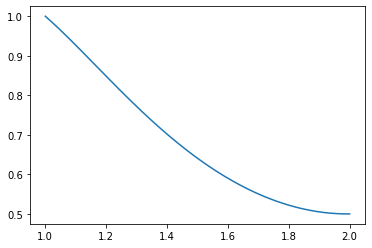

In [139]:
import scipy.integrate

def pb(x, n):
    if (n == 0):
        return (0.5 * (3 - x))
    else:
        return (x**(n+1) + (1 - 2**(n+1)) * x + 2**(n+1) - 2)
    
def dp(x, n):
    if (n == 0):
        return (-0.5)
    else:
        return ((n+1)*(x**n) + (1 - 2**(n+1)))
    
def ddp(x, n):
    if (n == 0):
        return 0
    else:
        return (n*(n+1)*x**(n-1))
        
    

p = lambda x: 2
q = lambda x: -3*x
f = lambda x: (2 - 8 * x) / (x**3)
a = 1.0
b = 2.0
alpha = [1, 0]
beta = [1, 0]
A = 1
B = 0.5
N = 100
dx = (b - a) / (N - 1)
x = []
for i in range (N):
    x.append(a + i * dx)

eps = 1e-3
y = SecondOrderScheme(a,b,A,B,alpha,beta,p,q,f,N)
while (True):
    N = N * 2
    dx = (b - a) / (N - 1)
    x = []
    for i in range (N):
        x.append(a + i * dx)
    y_new = SecondOrderScheme(a,b,A,B,alpha,beta,p,q,f,N)
    delta = max_norm(y, y_new, 2)
    print(delta)
    if (delta < eps):
        y = y_new.copy()
        break
    y = y_new.copy()
    
#print (y)
plt.plot(x, y)



N = 100
M = np.zeros ((N, N), float)
d = np.zeros (N, float)
for i in range(N):
    #print(scipy.integrate.quad(lambda z: (f(z) * pb(z, i)), 1.0, 2.0)[0])
    d[i] = scipy.integrate.quad(lambda z: (f(z) * pb(z, i)), 1.0, 2.0)[0]
    #print(d)
    for j in range(N):
        M[i][j] = scipy.integrate.quad(lambda z: (pb(z, i) * (ddp(z, j) + 2*dp(z, j) - 3*z*pb(z, j))), 1.0, 2.0)[0]
        
c = np.linalg.solve(M, d)
#print(c)
N_p = 100
dx = (b - a) / (N_p - 1)
x = []
y = []

for i in range (N_p):
    x.append(a + i * dx)
    y.append(0)
    for j in range(N):
        y[i] += c[j] * pb(x[i], j)

        
#plt.plot(x, y)
# реализация метода Галеркина нерабочая